In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""Generate data"""
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


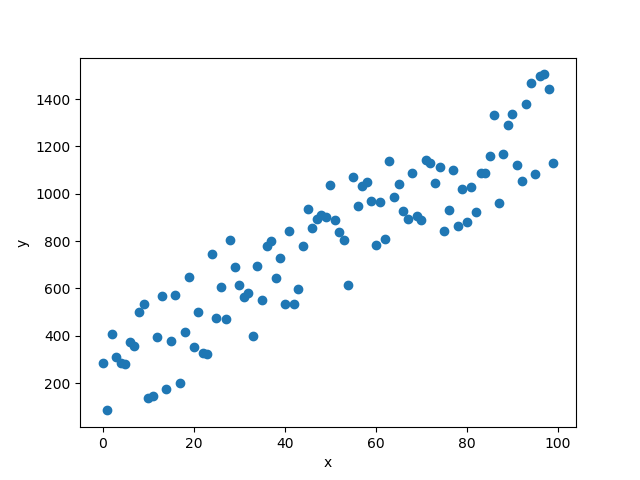

In [4]:
%matplotlib notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [6]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store

In [7]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 6980016.976811248
--------------------------
iteration: 1
cost: 26783.144220278744
--------------------------
iteration: 2
cost: 17866.34854873097
--------------------------
iteration: 3
cost: 17835.088171193413
--------------------------
iteration: 4
cost: 17829.568469473445
--------------------------
iteration: 5
cost: 17824.60323108864
--------------------------
iteration: 6
cost: 17819.659606580277
--------------------------
iteration: 7
cost: 17814.719427353015
--------------------------
iteration: 8
cost: 17809.782058601966
--------------------------
iteration: 9
cost: 17804.847476668925
--------------------------
iteration: 10
cost: 17799.91567921543
--------------------------
iteration: 11
cost: 17794.98666464768
--------------------------
iteration: 12
cost: 17790.060431398633
--------------------------
iteration: 13
cost: 17785.136977903054
--------------------------
iteration: 14
cost: 17780.216302596607
-------------------------

--------------------------
iteration: 149
cost: 17140.78564320508
--------------------------
iteration: 150
cost: 17136.228598100173
--------------------------
iteration: 151
cost: 17131.674124975125
--------------------------
iteration: 152
cost: 17127.12222238238
--------------------------
iteration: 153
cost: 17122.572888875166
--------------------------
iteration: 154
cost: 17118.026123007607
--------------------------
iteration: 155
cost: 17113.481923334562
--------------------------
iteration: 156
cost: 17108.94028841175
--------------------------
iteration: 157
cost: 17104.40121679567
--------------------------
iteration: 158
cost: 17099.864707043635
--------------------------
iteration: 159
cost: 17095.3307577138
--------------------------
iteration: 160
cost: 17090.79936736511
--------------------------
iteration: 161
cost: 17086.27053455731
--------------------------
iteration: 162
cost: 17081.744257850958
--------------------------
iteration: 163
cost: 17077.220535807446
---

--------------------------
iteration: 306
cost: 16455.929629142698
--------------------------
iteration: 307
cost: 16451.75916197567
--------------------------
iteration: 308
cost: 16447.591049202983
--------------------------
iteration: 309
cost: 16443.42528949939
--------------------------
iteration: 310
cost: 16439.26188154039
--------------------------
iteration: 311
cost: 16435.100824002184
--------------------------
iteration: 312
cost: 16430.942115561786
--------------------------
iteration: 313
cost: 16426.785754896864
--------------------------
iteration: 314
cost: 16422.63174068595
--------------------------
iteration: 315
cost: 16418.480071608188
--------------------------
iteration: 316
cost: 16414.33074634357
--------------------------
iteration: 317
cost: 16410.18376357276
--------------------------
iteration: 318
cost: 16406.0391219772
--------------------------
iteration: 319
cost: 16401.896820239046
--------------------------
iteration: 320
cost: 16397.756857041248
---

--------------------------
iteration: 464
cost: 15825.36093592292
--------------------------
iteration: 465
cost: 15821.546496036714
--------------------------
iteration: 466
cost: 15817.734210128949
--------------------------
iteration: 467
cost: 15813.924076987008
--------------------------
iteration: 468
cost: 15810.116095398971
--------------------------
iteration: 469
cost: 15806.310264153599
--------------------------
iteration: 470
cost: 15802.506582040305
--------------------------
iteration: 471
cost: 15798.705047849237
--------------------------
iteration: 472
cost: 15794.905660371169
--------------------------
iteration: 473
cost: 15791.108418397602
--------------------------
iteration: 474
cost: 15787.313320720676
--------------------------
iteration: 475
cost: 15783.520366133225
--------------------------
iteration: 476
cost: 15779.72955342877
--------------------------
iteration: 477
cost: 15775.940881401508
--------------------------
iteration: 478
cost: 15772.1543488462

In [8]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, cost, params_store

In [9]:

alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 6980016.976811248
--------------------------
iteration: 1
cost: 5911758.019467831
--------------------------
iteration: 2
cost: 4791828.131432588
--------------------------
iteration: 3
cost: 4792396.5736456085
--------------------------
iteration: 4
cost: 4502259.84194676
--------------------------
iteration: 5
cost: 3415129.5800403594
--------------------------
iteration: 6
cost: 3247212.9424468237
--------------------------
iteration: 7
cost: 2515342.953492927
--------------------------
iteration: 8
cost: 2272138.665526736
--------------------------
iteration: 9
cost: 1878764.6150836
--------------------------
iteration: 10
cost: 1843823.3017512714
--------------------------
iteration: 11
cost: 1790366.7365940914
--------------------------
iteration: 12
cost: 1783307.9549238787
--------------------------
iteration: 13
cost: 1741157.7282794747
--------------------------
iteration: 14
cost: 1571502.0391638868
--------------------------
ite

<IPython.core.display.Javascript object>


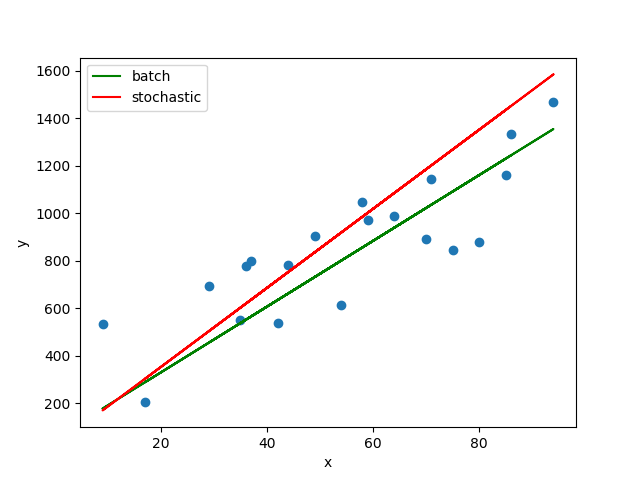

batch      T0, T1: 52.141932761921325, 13.845472978427388
stochastic T0, T1: 19.16383457400804, 16.642958912376123
batch rms:      177.54315404271307
stochastic rms: 220.65139663324751


In [10]:

plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

In [11]:
params_hat_batch

array([52.14193276, 13.84547298])